**Mašinsko učenje**

Akademska 2022/2023

Studenti: 
* Begović Amila 2031/18608
* Leka Elma 2035/18661
* Panjeta Eldar 2016/18711

Datum: 11.12.2022.

# **Prvi projektni zadatak**

## **Specifikacija projekta**

Projekat se radi u timu. Svaki tim se sastoji od 3-5 studenta. Sastavi timova određeni su u
koordinaciji sa predmetnim asistentom.
Implementacija: korištenjem Python googlecolab okruženja.
Prije početka rada na projektu u potpunosti pročitati specifikaciju projekta jer su taskovi
međusobno povezani. Specifikacija projekta prati gradivo predmeta (predavanja i vježbe).

## **Definisanje prvog zadatka**

1.1. Analizirati dobijeni set podataka sa kreditnim informacijama– dimenzije, broj i namjenu
varijabli.


1.2. Primjenom odgovarajućih metoda potrebno je analizirati pojedinačno sve varijable:
* tipove varijabli, 
* distribuciju, 
* deskriptivnu statistiku (srednju vrijednost, standardnu
devijaciju,…), 
* korelaciju između parova varijabli,….

Vizualizirajte proces istraživanja podataka za svaku varijablu i jasno argumentujte zapažanja i zaključke o svakoj varijabli.


1.3. Izvršiti odgovarajuće transformacije podataka, te uklanjanje nepodobnih vrijednosti da bi
dobili podatke koji su spremni za korištenje u većini metoda klasifikacije.


In [ ]:
# importi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# mound drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# učitavanje data set-a
df = pd.read_csv('/content/drive/Shareddrives/MU/creditscore_dataset.csv')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Customer_ID,Month,Name_and_Age,SSN,Occupation,Annual_Income,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0,0,0x1602,CUS_0xd40,January,"Aaron Maashoh,23",821-00-0265,Scientist,19114.12,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,1,1,1,0x1603,CUS_0xd40,February,"Aaron Maashoh,23",821-00-0265,Scientist,19114.12,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,2,2,2,0x1604,CUS_0xd40,3,"Aaron Maashoh,-500",821-00-0265,Scientist,19114.12,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,3,3,3,0x1605,CUS_0xd40,April,"Aaron Maashoh,23",821-00-0265,Scientist,19114.12,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,4,4,4,0x1606,CUS_0xd40,May,"Aaron Maashoh,23",821-00-0265,SCIENTIST,19114.12,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


# **Analiza svih podataka prije transformacije:**

In [ ]:
# dimenzije seta podataka
df.shape

(100022, 30)

In [ ]:
# broj varijabli
print("Broj varijabli u datasetu: " + str(len(df.columns)))

Broj varijabli u datasetu: 30


In [ ]:
# nazivi varijabli i tipovi podataka
print("Nazivi varijabli i tipovi podataka: \n")
df.dtypes

Nazivi varijabli i tipovi podataka: 



Unnamed: 0                    int64
Unnamed: 0.1                  int64
Unnamed: 0.1.1                int64
ID                           object
Customer_ID                  object
Month                        object
Name_and_Age                 object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts            object
Num_Credit_Card              object
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour           

In [ ]:
# Selekcija numeričkih varijabli
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerics = df.select_dtypes(include=numerics)
df_numerics

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Monthly_Inhand_Salary,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,0,0,0,1824.843333,3,3,4.0,26.822620,49.574949
1,1,1,1,NaN,3,-1,4.0,31.944960,49.574949
2,2,2,2,NaN,3,3,4.0,28.609352,49.574949
3,3,3,3,NaN,3,5,4.0,31.377862,49.574949
4,4,4,4,1824.843333,3,6,4.0,24.797347,49.574949
...,...,...,...,...,...,...,...,...,...
100017,100017,99995,99995,3359.415833,7,23,3.0,34.663572,35.104023
100018,100018,99996,99996,3359.415833,7,18,3.0,40.565631,35.104023
100019,100019,99997,99997,3359.415833,5729,27,3.0,41.255522,35.104023
100020,100020,99998,99998,3359.415833,7,20,3.0,33.638208,35.104023


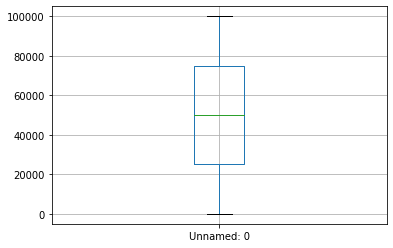

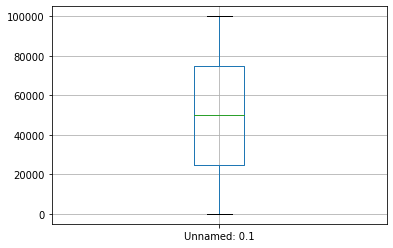

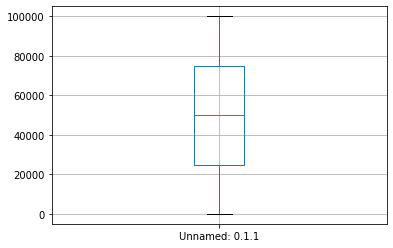

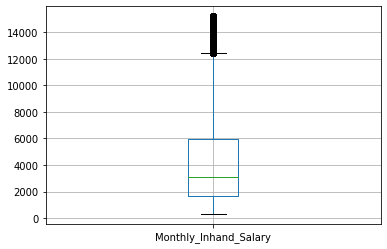

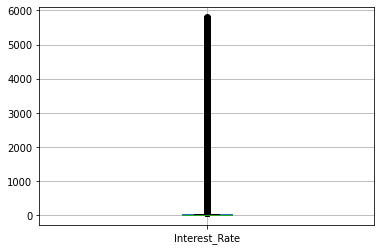

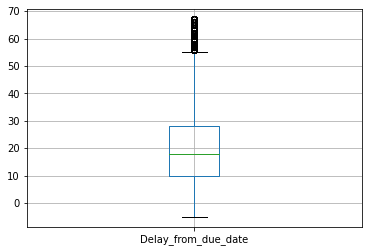

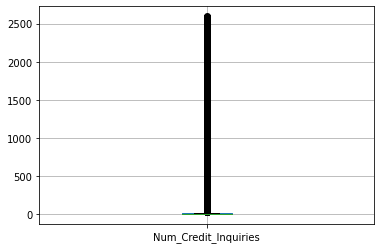

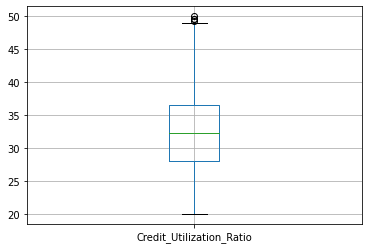

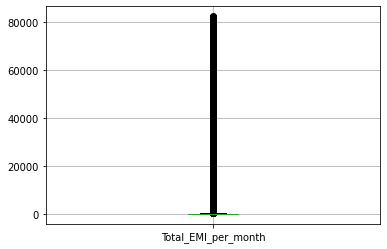

In [ ]:
#Distribucija numerickih varijabli - vizuelni prikaz pomoću boxplotova
for col in df_numerics:
  plt.figure()
  df.boxplot([col])

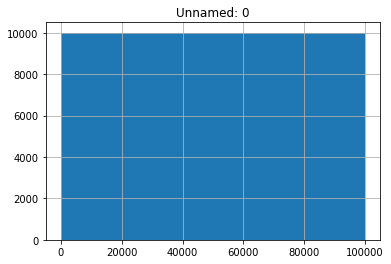

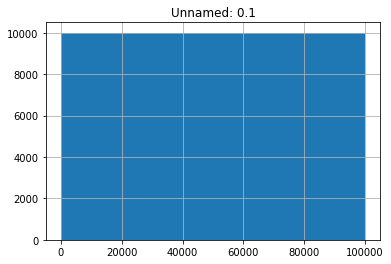

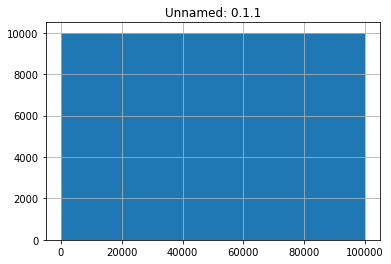

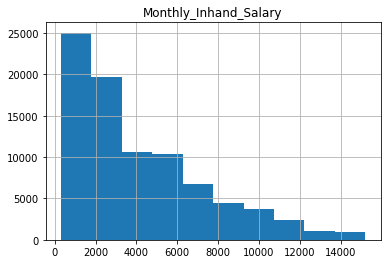

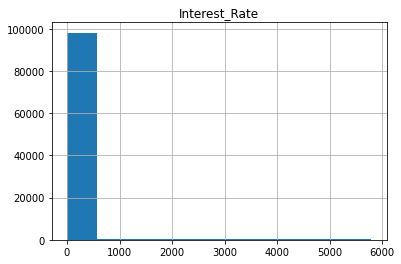

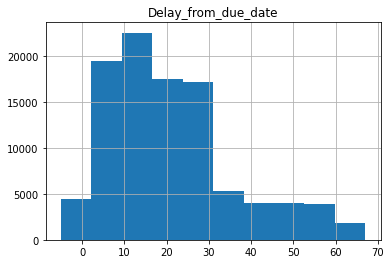

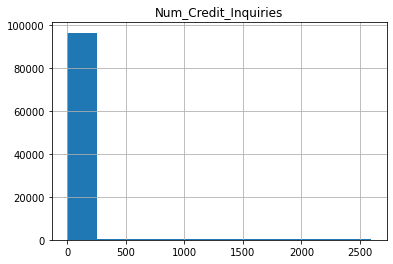

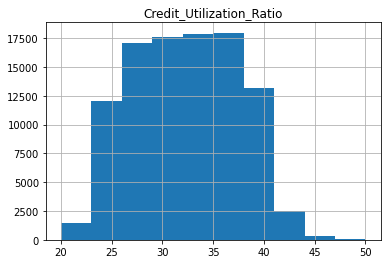

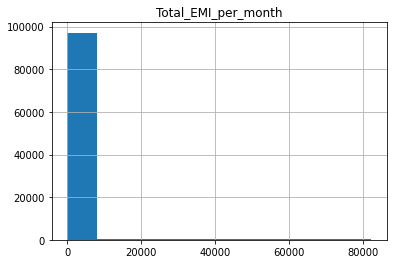

In [ ]:
#Distribucija numerickih varijabli - vizuelni prikaz pomoću histograma
for col in df_numerics:
    plt.figure()
    plt.title(col)
    df[col].hist()

In [ ]:
# Deskriptivna statistika za sve varijable
df.describe(percentiles=[.25, .5, .75], include="all")

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Customer_ID,Month,Name_and_Age,SSN,Occupation,Annual_Income,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100022.00000,100022.000000,100022.000000,100022,100022,100022,90034,100022,100022,100022,...,100022,100022,100022.000000,90988,100022,100022.000000,95541,100022,98822,100022
unique,NaN,NaN,NaN,100000,12500,8,25520,12501,46,18940,...,4,13178,NaN,404,4,NaN,91049,7,98790,3
top,NaN,NaN,NaN,0x14c33,CUS_0x5313,April,"Stempelj,35",#F%$D@*&8,_______,17273.83,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,NaN,NaN,NaN,2,9,12505,16,5576,7063,16,...,36489,24,NaN,447,37688,NaN,4305,25521,9,53182
mean,50010.50000,49998.855802,49998.855802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.284992,NaN,NaN,1403.551424,NaN,NaN,NaN,NaN
std,28874.00865,28867.943554,28867.943554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.116671,NaN,NaN,8308.208400,NaN,NaN,NaN,NaN
min,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,25005.25000,24998.250000,24998.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.052683,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,50010.50000,49999.500000,49999.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.305645,NaN,NaN,69.246684,NaN,NaN,NaN,NaN
75%,75015.75000,74999.750000,74999.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,36.496135,NaN,NaN,161.163199,NaN,NaN,NaN,NaN


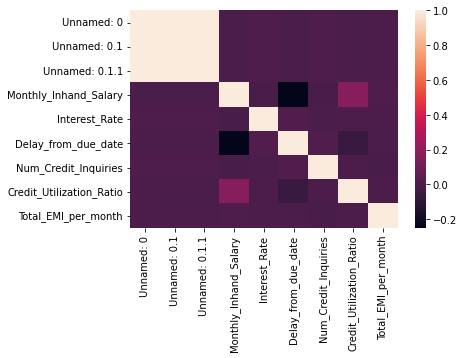

In [ ]:
#Vizuelni prikaz korelacije izmedju parova varijabli
CorrMatrix = pd.DataFrame.corr(df)
sns.heatmap(CorrMatrix)
plt.show()

In [ ]:
# Da bismo uspjeli izvršiti odgovarajuće transformacije podataka, tj. da bismo uklonili nepodobne vrijednosti iz dataset-a potrebno je prvo da analiziramo moguće vrijednosti za svaku kolonu.
# moguće vrijednosti za sve kolone
for col in df:
  if(df[col].dtypes == 'object'):
    print(col)
    print(df[col].unique())

ID
['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']
Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Month
['January' 'February' '3' 'April' 'May' '6' 'July' '8']
Name_and_Age
['Aaron Maashoh,23' 'Aaron Maashoh,-500' nan ... 'Sarah McBridec,29'
 'Nicks,24' 'Nicks,25']
SSN
['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Occupation
['Scientist' 'SCIENTIST' '_______' 'Teacher' 'TEACHER' 'Engineer'
 'Entrepreneur' 'Developer' 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist'
 'Manager' 'Accountant' 'accountant' 'teacher' 'Musician' 'musician'
 'media_manager' 'ENTREPRENEUR' 'Mechanic' 'Writer' 'Architect' 'manager'
 'scientist' 'MANAGER' 'mechanic' 'engineer' 'DEVELOPER' 'MUSICIAN'
 'JOURNALIST' 'architect' 'WRITER' 'DOCTOR' 'journalist' 'entrepreneur'
 'writer' 'lawyer' 'doctor' 'ARCHITECT' 'MECHANIC' 'LAWYER' 'developer'
 'MEDIA_MANAGER' 'ACCOUNTANT' 'ENGINEER']
Annual_Income
['19114.12' '3

# Analiza i transformacija podataka po kolonama

## **Transformacija kolona Unnamed: 0, Unnamed: 0.1, Unnamed: 0.1.1**

Unutar dataset-a se nalaze 3 Unnamed kolone. Iz razloga što su "unnamed" ne možemo izvući nikakve informacije o njima, te ćemo ih uklonuti iz dataset-a.

In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)

## **Transformacija kolone "Month"**

 Unutar kolone "Month" nalaze se vrijednosti za mjesec u obliku naziva mjeseca,
 ali i u obliku rednog broja. Potrebno je transformisati podatke da imaju isti oblik.
 Mi smo uzeli da transformišemo redni broj u naziv mjeseca, iz razloga što 
 ima manje kolona koje trebamo transformisati, te je naziv mjeseca intuitivniji 
 od rednog broja.

In [ ]:
# Transformacija
df['Month'].replace(['3', '6', '8'], ['March', 'June', 'August'], inplace=True)

In [ ]:
# Jedinstvene vrijednosti
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Month'].value_counts(dropna=False)

April       12505
August      12504
January     12503
June        12503
March       12502
May         12502
July        12502
February    12501
Name: Month, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Month'].describe(percentiles=[.25, .5, .75], include="all")

count     100022
unique         8
top        April
freq       12505
Name: Month, dtype: object

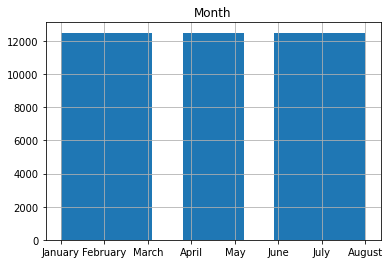

In [ ]:
# Histogram

plt.figure()
plt.title('Month')
df['Month'].hist()

## **Transformacija kolone "Name_and_Age"**

 Unutar kolone "Name_and_Age" se nalaze informacije o imenu i godinama korisnika
 unutar dataset-a. Te informacije kad su zajedno ne možemo koristiti ni za kakve
 proračune.

 Mi smo tu kolonu podijelili na dvije: Name i Age. Te smo primijetili da neke
 godine nisu "tačne". Tj. broj godina ne može biti negativan broj,
 a kako je maksimalan broj godina koji je dostignut: 122 godine i 164 dana, 
 za gornju granicu smo stavili 123 godine, te sve redove koji ne spadaju
 unutar intervala [0, 123) smo zamijenili sa srednjom vrijednošću godina.
 
  Nakon svih potrebnih
 transformacija izbacili smo i kolonu Name_and_Age

In [ ]:
def can_convert_to_int(string):
  """
    Pomoćna metoda koja provjerava da li se string može konvertovati u broj
  """
  try:
    int(string)
    return True
  except ValueError:
    return False

def split_name_and_age(row):
  """
    Pomoćna metoda koja pomaže u konverziji kolone Name_and_Age 
    u kolone Name i Age
  """
  if row is not np.NaN and row is not None:
    chunks = row.split(',')
    if(len(chunks) == 2):
      return pd.Series({'Name': chunks[0], 'Age': chunks[1]})
    if(len(chunks) == 1):
      if(can_convert_to_int(chunks[0])):
        return pd.Series({'Name': np.nan, 'Age': chunks[0]})
      else:
        return pd.Series({'Name': chunks[0], 'Age': np.nan})  
  return pd.Series({'Name': np.nan, 'Age': np.nan})    

In [ ]:
# Transformacija
df[['Name','Age']] = df.apply(lambda x: split_name_and_age(x['Name_and_Age']), axis=1)
df['Age'] = df['Age'].str.replace('_', '')
df['Age'] = df['Age'].astype('float')
df.loc[(df['Age'] < 0) | (df['Age'] > 122), 'Age'] = np.nan
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].apply(np.floor)

df['Name'] = df['Name'].str.title()
df = df.drop(['Name_and_Age'], axis=1)

In [ ]:
# Jedinstvene vrijednosti
df['Age'].unique()

array([ 23.,  33.,  28.,  34.,  54.,  55.,  21.,  31.,  30.,  24.,  44.,
        45.,  40.,  41.,  32.,  35.,  36.,  39.,  37.,  20.,  46.,  26.,
        42.,  48.,  38.,  43.,  22.,  16.,  19.,  18.,  15.,  27.,  25.,
        14.,  17.,  47.,  53.,  56.,  29.,  49.,  51.,  50.,  52., 112.,
       118.,  99., 100., 102., 111.,  95., 109., 115.])

In [ ]:
# Jedinstvene vrijednosti
df['Name'].unique()

array(['Aaron Maashoh', nan, 'Rick Rothackerj', ..., 'Chris Wickhamm',
       'Sarah Mcbridec', 'Nicks'], dtype=object)

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Age'].value_counts(dropna=False)

33.0     14865
38.0      2714
31.0      2676
28.0      2655
26.0      2646
32.0      2601
25.0      2595
27.0      2586
39.0      2575
35.0      2569
36.0      2542
44.0      2537
34.0      2530
41.0      2515
19.0      2506
37.0      2482
43.0      2473
22.0      2471
20.0      2470
30.0      2458
29.0      2456
24.0      2443
21.0      2430
23.0      2391
40.0      2372
45.0      2369
42.0      2311
18.0      2142
46.0      1447
15.0      1437
17.0      1345
16.0      1320
55.0      1244
49.0      1236
48.0      1228
52.0      1223
53.0      1193
54.0      1173
51.0      1155
50.0      1147
47.0      1098
14.0      1060
56.0       326
95.0         2
112.0        1
118.0        1
99.0         1
100.0        1
102.0        1
111.0        1
109.0        1
115.0        1
Name: Age, dtype: int64

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Name'].value_counts(dropna=False)

NaN               10071
Stevex               44
Langep               44
Jessicad             39
Vaughanl             39
                  ...  
Janeman Latulf        4
Julieno               4
Aileen Wangg          4
Matt Scuffhamk        4
Timothyl              3
Name: Name, Length: 10129, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Age'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean         33.280618
std          10.093665
min          14.000000
25%          26.000000
50%          33.000000
75%          40.000000
max         118.000000
Name: Age, dtype: float64

In [ ]:
# Deskriptivna statistika za kolonu
df['Name'].describe(percentiles=[.25, .5, .75], include="all")

count      89951
unique     10128
top       Langep
freq          44
Name: Name, dtype: object

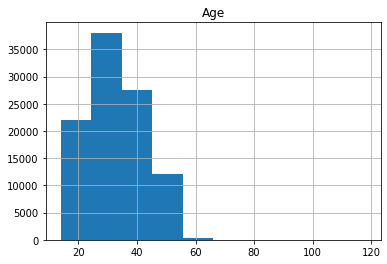

In [ ]:
# Histogram

plt.figure()
plt.title('Age')
df['Age'].hist()

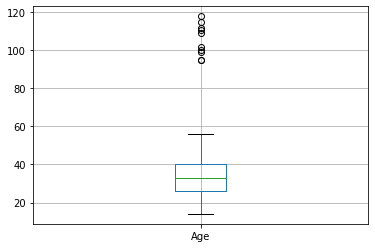

In [ ]:
# Boxplot
df.boxplot(['Age'])

## **Transformacija kolone "SSN"**

 Unutar kolone "SSN" nalaze se vrijednosti za social security number. One su jedinstvene za sve kolone i podaci nam ne daju nikakve relevantne informacije. Te kolonu možemo obrisati.

In [ ]:
# Transformacija
df = df.drop(['SSN'], axis=1)

## **Transformacija kolone "Occupation"**

 Unutar kolone "Occupation" nalaze se vrijednosti različog formata. 
 Formati: lowercase, UPPERCASE, CamelCase. Mi smo dataset transformisali u 
 CamelCase. 
Unutar dataset se nalazi i vrijednost '_______'. Tu smo vrijednost 
 pretvorili u 'No occupation'.

In [ ]:
# Transformacija
df['Occupation'] = df['Occupation'].str.title()
df['Occupation'].replace('_______', 'No occupation', inplace = True)
df['Occupation'] = df['Occupation'].str.replace("_", " ")

In [ ]:
# Jedinstvene vrijednosti
df['Occupation'].unique()

array(['Scientist', 'No occupation', 'Teacher', 'Engineer',
       'Entrepreneur', 'Developer', 'Lawyer', 'Media Manager', 'Doctor',
       'Journalist', 'Manager', 'Accountant', 'Musician', 'Mechanic',
       'Writer', 'Architect'], dtype=object)

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Occupation'].value_counts(dropna=False)

No occupation    7063
Lawyer           6577
Architect        6355
Engineer         6352
Scientist        6300
Mechanic         6292
Accountant       6272
Developer        6236
Media Manager    6233
Teacher          6215
Entrepreneur     6177
Doctor           6089
Journalist       6087
Manager          5976
Musician         5913
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Occupation'].describe(percentiles=[.25, .5, .75], include="all")

count            100022
unique               16
top       No occupation
freq               7063
Name: Occupation, dtype: object

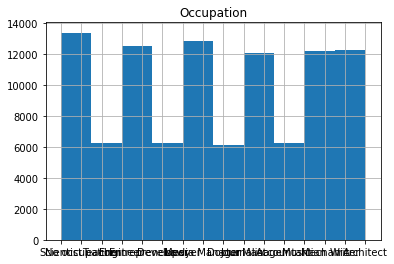

In [ ]:
# Histogram

plt.figure()
plt.title('Occupation')
df['Occupation'].hist()

## **Transformacija kolone "Annual_Income"**

 Unutar kolone "Annual_Income" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju donju crticu na kraju vrijednosti. 
 Te donje crtice smo uklonuli, te vrijednosti prebacili u float.

 Kolona sadrži dosta jedinstvenih vrijednosti, pa smo kolonu dodatno transformisali na način da smo kolonu grupisali po Customer_ID, te za svaku grupu zamijenili vrijednost Annual Incoma sa mean vrijednošću, a prije toga smo
 None vrijednosti zamijenili sa mean vrijednošću.

In [ ]:
# Transformacija
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Annual_Income'] = df['Annual_Income'].astype('float')
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform("mean")

In [ ]:
# Jedinstvene vrijednosti
df['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Annual_Income'].value_counts(dropna=False)

36585.120     16
17273.830     16
17816.750     16
109945.320    16
9141.630      16
              ..
41077.120      8
14527.455      8
104183.460     8
34660.860      8
39628.990      8
Name: Annual_Income, Length: 12492, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Annual_Income'].describe(percentiles=[.25, .5, .75], include="all")

count    1.000220e+05
mean     1.763843e+05
std      5.073754e+05
min      7.005930e+03
25%      2.006023e+04
50%      4.067844e+04
75%      8.292020e+04
max      7.442411e+06
Name: Annual_Income, dtype: float64

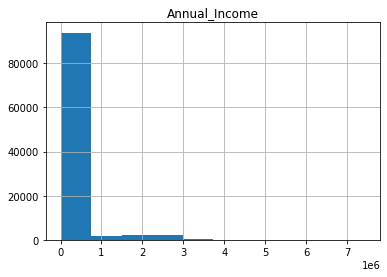

In [ ]:
# Histogram

plt.figure()
plt.title('Annual_Income')
df['Annual_Income'].hist()

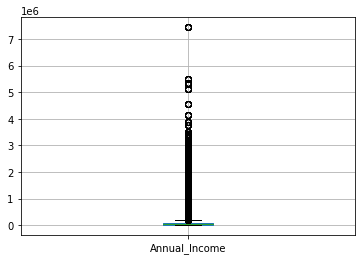

In [ ]:
# Boxplot
df.boxplot(['Annual_Income'])

## **Transformacija kolone "Monthly_Inhand_Salary"**

Unutar kolone "Monthly_Inhand_Salary" nalazi se dosta outliera.
 Njih cemo rijesiti grupisanjem po CustomerId, i određivanjem mode za grupu.

In [ ]:
# Transformacija
df['Monthly_Inhand_Salary'] = df.groupby("Customer_ID")['Monthly_Inhand_Salary'].transform("mean")

In [ ]:
# Jedinstvene vrijednosti
df['Monthly_Inhand_Salary'].unique()

array([ 1824.843333,  3037.986667, 12187.22    , ...,  3097.008333,
        1929.906667,  3359.415833])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Monthly_Inhand_Salary'].value_counts(dropna=False)

6358.956667    16
3080.555000    16
6639.560000    16
6769.130000    16
6082.187500    16
               ..
2782.405000     8
5389.321667     8
1927.096667     8
4590.930000     8
3359.415833     8
Name: Monthly_Inhand_Salary, Length: 12491, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Monthly_Inhand_Salary'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean       4198.153978
std        3186.948625
min         303.645417
25%        1625.597917
50%        3097.008333
75%        5961.637500
max       15204.633330
Name: Monthly_Inhand_Salary, dtype: float64

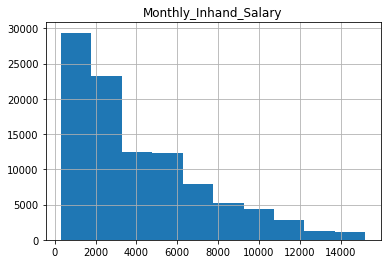

In [ ]:
# Histogram

plt.figure()
plt.title('Monthly_Inhand_Salary')
df['Monthly_Inhand_Salary'].hist()

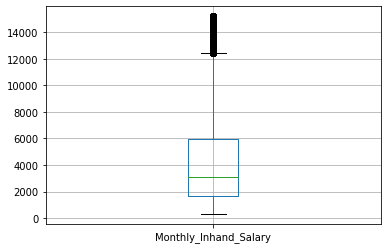

In [ ]:
# Boxplot
df.boxplot(['Monthly_Inhand_Salary'])

## **Transformacija kolone "Num_Bank_Accounts"**

 Unutar kolone "Num_Bank_Accounts" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju donju crticu na kraju vrijednosti. 
 Te donje crtice smo uklonuli, te vrijednosti prebacili u float.

 Kolona sadrži dosta jedinstvenih vrijednosti, pa smo kolonu dodatno transformisali na način da smo kolonu grupisali po Customer_ID, te za svaku grupu zamijenili vrijednost Annual Incoma sa mean vrijednošću.

 Pošto ova kolona predstavlja količinu, brojeve smo prebacili u cijele.

In [ ]:
# Transformacija
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].str.replace('accounts', '')
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].str.replace(' ', '')
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype('float')
df["Num_Bank_Accounts"] = df.groupby("Customer_ID")['Num_Bank_Accounts'].transform("mean")
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(np.floor)

In [ ]:
# Jedinstvene vrijednosti
df['Num_Bank_Accounts'].unique()

array([  3.,   2.,   1.,   7.,   4.,   0.,   8.,   5.,   6.,   9.,  10.,
       183., 160.,  15.,  76., 189.,  17.,  68., 210., 218., 169.,  88.,
       119., 209.,  86., 111., 130., 190., 198., 177., 206.,  19., 225.,
       144., 109., 101., 145., 110., 207., 115., 212., 105., 174.,  13.,
        95.,  59.,  29., 211., 219.,  83.,  89., 216., 191.,  67.,  57.,
       150., 186., 126., 131.,  72., 166., 334., 259., 138., 204., 154.,
        84.,  73., 229.,  42.,  99., 157., 108.,  35.,  26., 132., 159.,
       223., 170.,  71., 208.,  98., 202., 102.,  69.,  94., 125., 128.,
       141., 214., 337., 194., 163.,  77., 222.,  75.,  60., 185., 129.,
       220.,  39., 158., 112., 168., 120.,  20., 172., 233.,  62.,  32.,
       114.,  49., 195.,  81., 205.,  74.,  50., 167., 103.,  87., 226.,
        22., 184.,  53.,  43., 124.,  25., 187., 171., 137.,  79., 153.,
        23., 133., 148.,  85., 136., 176.,  96., 175., 143.,  97.,  54.,
       146.,  46., 203., 200., 155.,  78., 224., 10

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Num_Bank_Accounts'].value_counts(dropna=False)

6.0      11921
7.0      11699
8.0      11596
4.0      11203
5.0      10892
         ...  
232.0        8
276.0        8
314.0        8
246.0        8
242.0        8
Name: Num_Bank_Accounts, Length: 261, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Num_Bank_Accounts'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean         17.033183
std          41.399076
min          -1.000000
25%           4.000000
50%           6.000000
75%           8.000000
max         411.000000
Name: Num_Bank_Accounts, dtype: float64

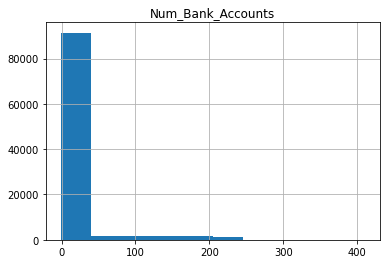

In [ ]:
# Histogram

plt.figure()
plt.title('Num_Bank_Accounts')
df['Num_Bank_Accounts'].hist()

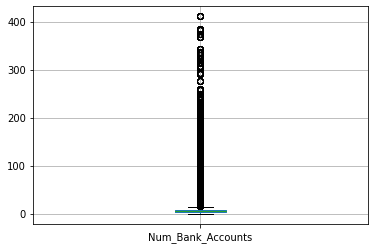

In [ ]:
# Boxplot
df.boxplot(['Num_Bank_Accounts'])

## **Transformacija kolone "Num_Credit_Card"**

 Unutar kolone "Num_Credit_Card" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju donju crticu na kraju vrijednosti. 
 Te donje crtice smo uklonuli, te vrijednosti prebacili u float.

 Kolona sadrži dosta jedinstvenih vrijednosti, pa smo kolonu dodatno transformisali na način da smo kolonu grupisali po Customer_ID, te za svaku grupu zamijenili vrijednost Num_Credit_Card sa mean vrijednošću.

  Pošto ova kolona predstavlja količinu, brojeve smo prebacili u cijele.

In [ ]:
# Transformacija
df['Num_Credit_Card'] = df['Num_Credit_Card'].str.replace('cards', '')
df['Num_Credit_Card'] = df['Num_Credit_Card'].str.replace(' ', '')
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype('float')
df["Num_Credit_Card"] = df.groupby("Customer_ID")['Num_Credit_Card'].transform("mean")
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(np.floor)

In [ ]:
# Jedinstvene vrijednosti
df['Num_Credit_Card'].unique()

array([  4., 176.,   5., 165.,   1.,   7.,   6., 134.,  65.,   8., 177.,
       119.,   3.,  70., 130.,   9., 316.,   2.,  10.,  66., 123.,  35.,
       107., 122., 158.,  94., 109., 148.,  88., 166.,  62., 189., 153.,
        25., 186., 327.,  26.,  71., 151., 164., 147.,  69., 104.,  16.,
        33., 127., 181.,  32., 184.,  81.,  18.,  38.,  20., 167.,  60.,
        23., 100., 132., 115.,  47., 128., 118., 139., 112.,  55., 182.,
        21.,  54.,  79.,  42.,  80.,  68., 157.,  84., 174., 351.,  90.,
        86., 155., 178., 357.,  52.,  31., 138., 254., 175.,  77.,  53.,
         0., 168., 116.,  41., 136., 120., 150., 195., 101., 145., 113.,
        13.,  44., 202.,  95., 163.,  19., 283.,  36., 140., 133.,  89.,
       213., 315., 334., 114., 121., 156.,  92.,  97.,  12.,  75., 143.,
        43., 159., 144.,  99., 188.,  22., 171.,  11.,  49.,  96., 102.,
       152.,  63., 169.,  46., 193., 160., 187.,  57., 111., 103.,  30.,
        83.,  40., 142.,  67., 231., 323., 185., 28

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Num_Credit_Card'].value_counts(dropna=False)

5.0      15579
6.0      14182
7.0      13892
4.0      12017
3.0      11498
         ...  
371.0        8
268.0        8
212.0        8
248.0        8
201.0        8
Name: Num_Credit_Card, Length: 259, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Num_Credit_Card'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean         22.384625
std          45.484734
min           0.000000
25%           4.000000
50%           6.000000
75%           8.000000
max         371.000000
Name: Num_Credit_Card, dtype: float64

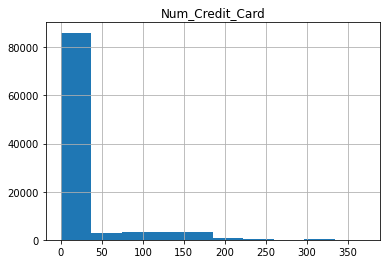

In [ ]:
# Histogram

plt.figure()
plt.title('Num_Credit_Card')
df['Num_Credit_Card'].hist()

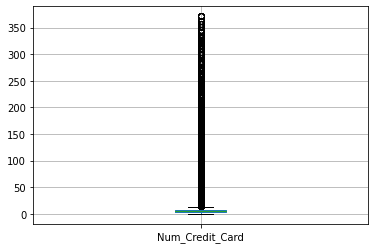

In [ ]:
# Boxplot
df.boxplot(['Num_Credit_Card'])

## **Transformacija kolone "Interest_Rate"**

 Unutar kolone "Interest_Rate" nalazi se dosta outliera.
 Njih cemo rijesiti grupisanjem po CustomerId, i određivanjem mean za grupu.

In [ ]:
# Transformacija
df["Interest_Rate"] = df.groupby("Customer_ID")['Interest_Rate'].transform("mean")

In [ ]:
# Jedinstvene vrijednosti
df['Interest_Rate'].unique()

array([  3.   ,   6.   ,   8.   , ..., 553.875,  67.625, 256.5  ])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Interest_Rate'].value_counts(dropna=False)

8.000      4416
5.000      4273
6.000      4026
10.000     4024
9.000      3960
           ... 
299.250       8
143.375       8
596.625       8
767.250       8
256.500       8
Name: Interest_Rate, Length: 1646, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Interest_Rate'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean         72.462958
std         165.014774
min           1.000000
25%           8.000000
50%          16.000000
75%          27.000000
max        1601.750000
Name: Interest_Rate, dtype: float64

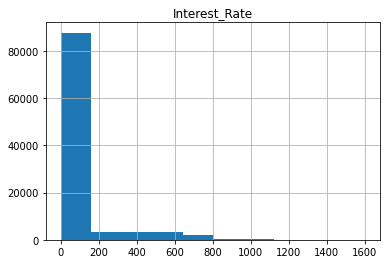

In [ ]:
# Histogram

plt.figure()
plt.title('Interest_Rate')
df['Interest_Rate'].hist()

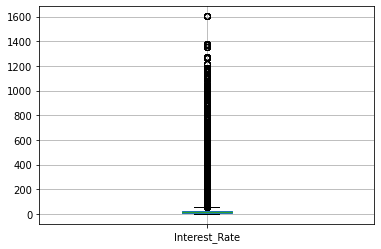

In [ ]:
# Boxplot
df.boxplot(['Interest_Rate'])

## **Transformacija kolone "Num_of_Loan"**

 Unutar kolone "Num_of_Loan" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju dodatan tekst uz vrijednost.
 Taj tekst smo uklonuli i kolonu prebacili u float vrijednosti.

 Nan vrijednosti smo zamijenili sa 0, dok smo se riješili 
 nekih outliera mijenjanjem vrijednosti kolona tako što smo grupisali
 kolone po Customer_ID, te izračunali mean vrijednost

  Pošto ova kolona predstavlja količinu, brojeve smo prebacili u pozivine  cijele.



In [ ]:
# Transformacija
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].astype('float')
df.loc[(df['Num_of_Loan'] < 0)] = np.nan
df['Num_of_Loan'].fillna(df['Num_of_Loan'].mean(), inplace=True)
df["Num_of_Loan"] = df.groupby("Customer_ID")['Num_of_Loan'].transform("mean")
df['Num_of_Loan'] = df['Num_of_Loan'].apply(np.floor)
df['Num_of_Loan'].fillna(0, inplace=True)

In [ ]:
# Jedinstvene vrijednosti
df['Num_of_Loan'].unique()

array([  4.,   1., 123.,   0.,   2.,   3.,   7.,   5.,   6.,   8.,   9.,
       212.,  81.,  45.,  68., 248.,  23.,  73.,  43.,  62.,  93., 219.,
        99., 145.,  74.,  91., 110.,  78.,  79.,  19.,  83.,  94., 139.,
       149., 167.,  10., 121., 108., 118., 181.,  25.,  55., 126., 159.,
        66., 206., 173.,  12., 185., 134., 129., 168.,  24.,  48., 186.,
        20., 124., 155., 143., 140., 154.,  53.,  77., 197.,  44., 202.,
       169.,  69., 183., 116., 170., 204., 150.,  15., 172., 105., 101.,
       153., 100., 151., 130., 137.,  11., 102.,  60., 171.,  70.,  59.,
       114., 160.,  34.,  97., 188.,  32.,  38., 178., 213.,  36.,  65.,
        61., 189., 175.,  90., 165., 136., 106.,  57.,  31., 125.,  51.,
        96.,  21.,  82.,  33.,  54., 158., 161.,  29., 337.,  41.,  47.,
       120.,  71.,  50.,  18.,  49., 286.,  14.,  56., 127.,  30.,  37.,
       109., 107.,  39.,  76.,  42., 119., 347., 112., 184., 147., 128.,
        46., 142.,  26., 182., 162., 177.,  67.,  2

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Num_of_Loan'].value_counts(dropna=False)

3.0      14692
2.0      14606
0.0      14418
4.0      14142
1.0      10197
         ...  
232.0        6
230.0        6
174.0        6
246.0        6
88.0         5
Name: Num_of_Loan, Length: 193, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Num_of_Loan'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean          6.878187
std          21.746616
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max         347.000000
Name: Num_of_Loan, dtype: float64

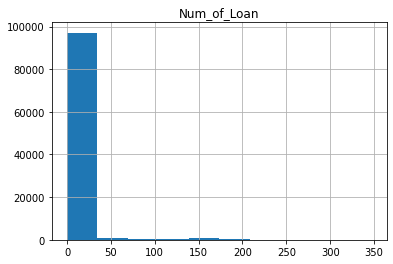

In [ ]:
# Histogram

plt.figure()
plt.title('Num_of_Loan')
df['Num_of_Loan'].hist()

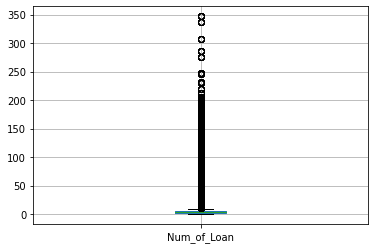

In [ ]:
# Boxplot
df.boxplot(['Num_of_Loan'])

## **Transformacija kolone "Type_of_Loan"**

 Unutar kolone "Type_of_Loan" nalaze se vrijednosti koji su stringovi koji govore
 koje sve vrste zajmova postoje za taj red, ali od tih podataka ne možemo izvući
 nikakve korektne informacije. Pa smo iz tog razloga kreirali kolone koje sadrže
 informaciju da li taj određeni zajam postoji za određeni red. 
 Nakon izvlačenja novih kolona obrisali smo staru kolonu Type of Loan

In [ ]:
# Transformacija
df['Auto_Loan'] = np.where(df['Type_of_Loan'].str.contains('Auto Loan'), True, False)
df['Credit_Builder_Loan'] = np.where(df['Type_of_Loan'].str.contains('Credit-Builder Loan'), True, False)
df['Personal_Loan'] = np.where(df['Type_of_Loan'].str.contains('Personal Loan'), True, False)
df['Home_Equity_Loan'] = np.where(df['Type_of_Loan'].str.contains('Home Equity Loan'), True, False)
df['Not_Specified'] = np.where(df['Type_of_Loan'].str.contains('Not Specified') | df['Type_of_Loan'].str.contains('uknown'), True, False)
df['Payday_Loan'] = np.where(df['Type_of_Loan'].str.contains('Payday Loan'), True, False)
df['Student_Loan'] = np.where(df['Type_of_Loan'].str.contains('Student_Loan'), True, False)
df['Mortgage_Loan'] = np.where(df['Type_of_Loan'].str.contains('Mortgage Loan'), True, False)
df['Debt_Consolidation_Loan'] = np.where(df['Type_of_Loan'].str.contains('Debt Consolidation Loan'), True, False)
df = df.drop(['Type_of_Loan'], axis=1)

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df[['Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan', 'Home_Equity_Loan', 'Not_Specified', 'Payday_Loan', 'Student_Loan', 'Mortgage_Loan', 'Debt_Consolidation_Loan']].value_counts(dropna=False)

Auto_Loan  Credit_Builder_Loan  Personal_Loan  Home_Equity_Loan  Not_Specified  Payday_Loan  Student_Loan  Mortgage_Loan  Debt_Consolidation_Loan
True       True                 True           True              False          True         True          True           True                       11457
False      False                False          False             True           False        False         False          False                       5367
           True                 False          False             False          False        False         False          False                       2025
           False                True           False             False          False        False         False          False                       2007
                                False          False             False          True         False         False          False                       1987
                                                                               

In [ ]:
# Deskriptivna statistika za kolonu
df[['Auto_Loan', 'Credit_Builder_Loan', 'Personal_Loan', 'Home_Equity_Loan', 'Not_Specified', 'Payday_Loan', 'Student_Loan', 'Mortgage_Loan', 'Debt_Consolidation_Loan']].describe(percentiles=[.25, .5, .75], include="all")

,Auto_Loan,Credit_Builder_Loan,Personal_Loan,Home_Equity_Loan,Not_Specified,Payday_Loan,Student_Loan,Mortgage_Loan,Debt_Consolidation_Loan
count,100022,100022,100022,100022,100022,100022,100022,100022,100022
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False
freq,59148,58096,58691,58379,66156,57834,88565,58405,58674


## **Transformacija kolone "Num_of_Delayed_Payment"**

 Unutar kolone "Num_of_Delayed_Payment" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju dodatan tekst uz vrijednost.
 Taj tekst smo uklonuli i kolonu prebacili u float vrijednosti. 
 U koloni postoje i negativne i NaN vrijednosti. Kolonu smo grupisali po CustomerId
 i uzeli srednju vrijednost Num_of_Delayed_Payment za grupu da bismo transformisali
 vrijednosti.

In [ ]:
# Transformacija
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'].replace('_', np.NaN, inplace = True)
df['Num_of_Delayed_Payment'].replace('', np.NaN, inplace = True)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')
df.loc[df['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = np.NaN
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df.mean())
df["Num_of_Delayed_Payment"] = df.groupby("Customer_ID")['Num_of_Delayed_Payment'].transform("mean")
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(np.floor)

<ipython-input-161-9cdd1bc0159c>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df.mean())


In [ ]:
# Jedinstvene vrijednosti
df['Num_of_Delayed_Payment'].unique()

array([6.000e+00, 2.000e+00, 1.400e+01, 7.000e+00, 1.300e+01, 1.100e+01,
       0.000e+00, 1.900e+01, 1.000e+00, 8.000e+00, 1.200e+01, 1.000e+01,
       1.800e+01, 2.100e+01, 9.000e+00, 5.000e+00, 4.320e+02, 1.700e+01,
       2.000e+01, 3.920e+02, 1.850e+02, 2.400e+01, 4.600e+02, 1.600e+01,
       2.300e+01, 3.600e+01, 1.500e+01, 1.510e+02, 1.180e+02, 3.000e+00,
       3.380e+02, 2.200e+01, 4.000e+00, 2.680e+02, 9.000e+01, 4.420e+02,
       4.210e+02, 1.250e+02, 1.020e+02, 4.860e+02, 2.500e+01, 3.120e+02,
       2.660e+02, 1.950e+02, 5.280e+02, 3.690e+02, 2.840e+02, 3.420e+02,
       2.600e+01, 3.400e+01, 3.850e+02, 6.400e+01, 5.990e+02, 4.730e+02,
       3.100e+02, 6.000e+02, 2.530e+02, 1.110e+02, 3.940e+02, 3.320e+02,
       3.900e+01, 1.490e+02, 3.210e+02, 2.120e+02, 3.610e+02, 2.260e+02,
       4.790e+02, 1.590e+02, 5.600e+02, 2.170e+02, 4.130e+02, 1.320e+02,
       3.930e+02, 4.980e+02, 8.900e+01, 5.020e+02, 2.000e+02, 2.640e+02,
       2.910e+02, 4.050e+02, 1.530e+02, 1.710e+02, 

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Num_of_Delayed_Payment'].value_counts(dropna=False)

19.0     6108
18.0     5713
16.0     5690
15.0     5570
9.0      5506
         ... 
434.0       8
613.0       8
433.0       8
113.0       8
350.0       8
Name: Num_of_Delayed_Payment, Length: 452, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Num_of_Delayed_Payment'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean         30.611455
std          84.007060
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max        1147.000000
Name: Num_of_Delayed_Payment, dtype: float64

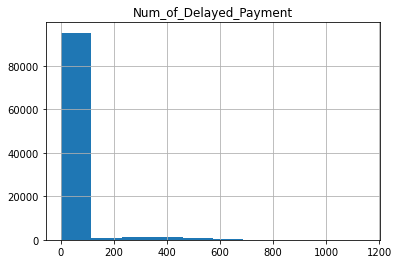

In [ ]:
# Histogram

plt.figure()
plt.title('Num_of_Delayed_Payment')
df['Num_of_Delayed_Payment'].hist()

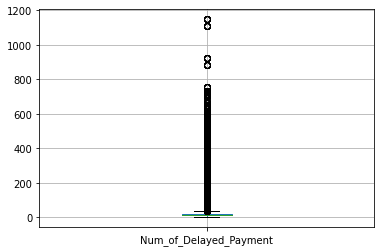

In [ ]:
# Boxplot
df.boxplot(['Num_of_Delayed_Payment'])

## **Transformacija kolone "Changed_Credit_Limit"**

 Unutar kolone "Changed_Credit_Limit" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju dodatan tekst uz vrijednost.
 Taj tekst smo uklonuli i kolonu prebacili u float vrijednosti.
 Unutar kolone je postojala i vrijednost _. Tu smo vrijednost prvo transformisali 
 u NaN, da bismo kolonu mogli prebaciti u float. Nakon čega smo vrijednosi NaN,
 transformisali u median vrijednost kolone.

In [ ]:
# Transformacija
df['Changed_Credit_Limit'].replace('_', np.NaN, inplace = True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')
df["Changed_Credit_Limit"] = df.groupby("Customer_ID")['Changed_Credit_Limit'].transform("mean")

In [ ]:
# Jedinstvene vrijednosti
df['Changed_Credit_Limit'].unique()

array([10.27      ,  5.795     ,  7.85      , ..., 18.93714286,
       17.55857143,  0.965     ])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Changed_Credit_Limit'].value_counts(dropna=False)

11.020000    80
8.770000     80
8.230000     80
9.250000     80
8.190000     80
             ..
14.305714     8
9.797143      8
20.665000     8
29.085000     8
0.965000      8
Name: Changed_Credit_Limit, Length: 5894, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Changed_Credit_Limit'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean         10.388280
std           6.542724
min          -1.070000
25%           5.455000
50%           9.370000
75%          14.655000
max          31.115000
Name: Changed_Credit_Limit, dtype: float64

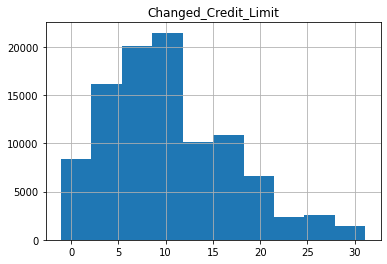

In [ ]:
# Histogram

plt.figure()
plt.title('Changed_Credit_Limit')
df['Changed_Credit_Limit'].hist()

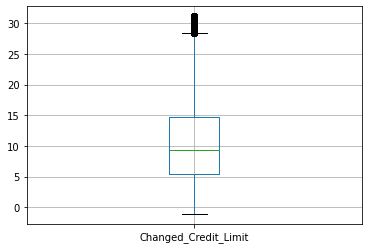

In [ ]:
# Boxplot
df.boxplot(['Changed_Credit_Limit'])

## **Transformacija kolone "Num_Credit_Inquiries"**

 Unutar kolone "Num_Credit_Inquiries" nalazi se dosta outliera.
 Njih cemo rijesiti grupisanjem po CustomerId, i određivanjem mean za grupu.

In [ ]:
# Transformacija
df["Num_Credit_Inquiries"] = df.groupby("Customer_ID")['Num_Credit_Inquiries'].transform("mean")
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(np.floor)

In [ ]:
# Jedinstvene vrijednosti
df['Num_Credit_Inquiries'].unique()

array([  4.,   2.,   3.,   5.,   6.,   7.,   0.,   9.,   1., 136., 437.,
        10.,  77.,   8.,  11., 202.,  66.,  13.,  12., 160.,  15.,  14.,
        17.,  37.,  18.,  87., 161., 240., 245., 341., 164., 158., 317.,
       285., 137., 150., 257., 250., 151., 287., 130., 189.,  57.,  74.,
       122., 106., 230., 169., 368., 219.,  75.,  79., 146., 273., 156.,
       129.,  23., 482., 104., 263., 152., 271., 166.,  67., 221.,  43.,
        61., 194., 171., 374., 278.,  69., 100., 235., 178., 282.,  49.,
        29.,  35., 234., 180.,  58., 168.,  16., 183., 163., 147.,  41.,
       288., 326., 195.,  33., 116., 576., 121., 176., 212., 159., 157.,
       184., 131.,  76., 207., 268.,  92., 196., 205., 259., 294., 270.,
       188., 289., 277., 154., 108., 264., 142., 225.,  53., 269.,  51.,
        38., 247., 253., 291., 231., 321.,  32., 276.,  56.,  40., 329.,
       280., 243.,  85., 299., 261., 300., 102., 367.,  63.,  86., 255.,
       281., 135., 177.,  26., 304., 200., 323., 31

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Num_Credit_Inquiries'].value_counts(dropna=False)

4.0      10611
3.0       9161
2.0       8226
1.0       7408
7.0       7018
         ...  
47.0         8
602.0        8
330.0        8
238.0        8
316.0        8
Name: Num_Credit_Inquiries, Length: 380, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Num_Credit_Inquiries'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean         27.407770
std          68.758637
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max         602.000000
Name: Num_Credit_Inquiries, dtype: float64

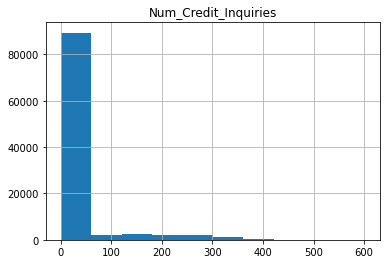

In [ ]:
# Histogram

plt.figure()
plt.title('Num_Credit_Inquiries')
df['Num_Credit_Inquiries'].hist()

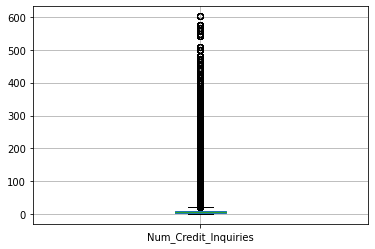

In [ ]:
# Boxplot
df.boxplot(['Num_Credit_Inquiries'])

## **Transformacija kolone "Credit_Mix"**

 Unutar kolone "Credit_Mix" nalaze se 4 različite vrijednosti. Sve su intuitivne,
 sem vrijednosti '_'. Tu smo vrijednost zamijenili sa "Unknown"

In [ ]:
# Transformacija
df['Credit_Mix'].replace('_', 'Unknown', inplace = True)

In [ ]:
# Jedinstvene vrijednosti
df['Credit_Mix'].unique()

array(['Unknown', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Credit_Mix'].value_counts(dropna=False)

Standard    36489
Good        24339
Unknown     20199
Bad         18995
Name: Credit_Mix, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Credit_Mix'].describe(percentiles=[.25, .5, .75], include="all")

count       100022
unique           4
top       Standard
freq         36489
Name: Credit_Mix, dtype: object

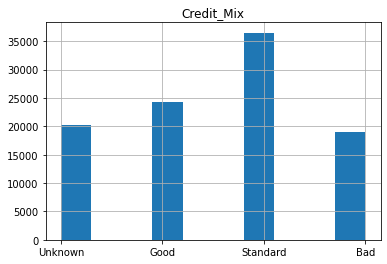

In [ ]:
# Histogram

plt.figure()
plt.title('Credit_Mix')
df['Credit_Mix'].hist()

## **Transformacija kolone "Outstanding_Debt"**

 Unutar kolone "Outstanding_Debt" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju dodatan tekst uz vrijednost.
 Taj tekst smo uklonuli i kolonu prebacili u float vrijednosti.


In [ ]:
# Transformacija
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df.mean())
df["Outstanding_Debt"] = df.groupby("Customer_ID")['Outstanding_Debt'].transform("mean")

<ipython-input-192-3c9c8c7f912f>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df.mean())


In [ ]:
# Jedinstvene vrijednosti
df['Outstanding_Debt'].unique()

array([ 809.98,  605.03, 1303.01, ...,  620.64, 3571.7 ,  502.38])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Outstanding_Debt'].value_counts(dropna=False)

1360.45    24
460.46     24
1151.70    24
1109.03    24
2552.06    16
           ..
2344.43     8
1255.36     8
2462.92     8
1195.71     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Outstanding_Debt'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean       1426.277013
std        1155.131588
min           0.230000
25%         566.080000
50%        1166.230000
75%        1946.810000
max        4998.070000
Name: Outstanding_Debt, dtype: float64

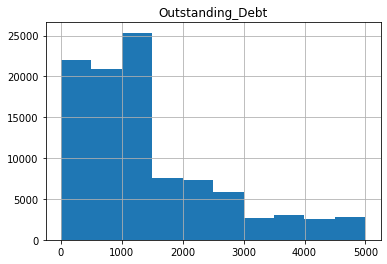

In [ ]:
# Histogram

plt.figure()
plt.title('Outstanding_Debt')
df['Outstanding_Debt'].hist()

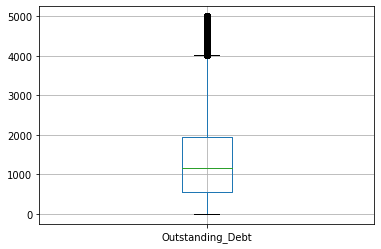

In [ ]:
# Boxplot
df.boxplot(['Outstanding_Debt'])

## **Transformacija kolone "Credit_History_Age"**

 Unutar kolone "Credit_History_Age" nalaze se vrijednosti koje su stringovi, 
 ali predstavljaju broj godina i mjeseci. S tom informacijom u obliku stringa,
 ne možemo raditi ništa. Te smo vrijednosti prebacili u broj mjeseci pomoću 
 pomočne metode.

In [ ]:
def toMonths(input):
  """
    Pomoćna metoda kreirana za pretvaranje vrijednosti inputa u broj mjeseci
  """
  if input is not np.NaN:
    numbers = [int(i) for i in input.split() if i.isdigit()]
    if len(numbers) != 2:
      return input
    years = numbers[0]
    months = numbers[1] 
    total_months = years*12 + months
    return total_months

In [ ]:
# Transformacija
for x in df['Credit_History_Age'].unique():
  df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(str(x), str(toMonths(x)))
df["Credit_History_Age"].fillna('0', inplace = True)
df['Credit_History_Age'] = df['Credit_History_Age'].astype('float')

In [ ]:
# Jedinstvene vrijednosti
df['Credit_History_Age'].unique()

array([2.650e+02, 0.000e+00, 2.670e+02, 2.680e+02, 2.690e+02, 2.700e+02,
       2.710e+02, 3.190e+02, 3.200e+02, 3.210e+02, 3.220e+02, 3.230e+02,
       3.240e+02, 3.250e+02, 3.260e+02, 2.130e+02, 2.140e+02, 2.150e+02,
       2.170e+02, 2.180e+02, 2.190e+02, 2.200e+02, 2.070e+02, 2.080e+02,
       2.090e+02, 2.100e+02, 2.110e+02, 2.120e+02, 3.680e+02, 3.690e+02,
       3.700e+02, 3.710e+02, 3.720e+02, 3.730e+02, 3.740e+02, 3.750e+02,
       3.840e+02, 3.860e+02, 3.870e+02, 3.890e+02, 3.900e+02, 3.670e+02,
       1.760e+02, 1.770e+02, 1.780e+02, 1.790e+02, 1.800e+02, 1.810e+02,
       1.820e+02, 2.560e+02, 2.570e+02, 2.580e+02, 2.590e+02, 2.600e+02,
       2.610e+02, 2.620e+02, 2.630e+02, 3.180e+02, 2.300e+02, 2.310e+02,
       2.320e+02, 2.330e+02, 2.340e+02, 2.350e+02, 2.360e+02, 3.050e+02,
       3.060e+02, 3.070e+02, 3.080e+02, 3.090e+02, 3.100e+02, 3.110e+02,
       3.120e+02, 3.270e+02, 3.280e+02, 3.290e+02, 1.070e+02, 1.080e+02,
       1.090e+02, 1.100e+02, 1.110e+02, 1.120e+02, 

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Credit_History_Age'].value_counts(dropna=False)

0.0      9034
196.0     775
170.0     688
232.0     678
171.0     672
         ... 
3.0        20
2.0        15
403.0      14
404.0      12
1.0         2
Name: Credit_History_Age, Length: 352, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Credit_History_Age'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean        253.066735
std         337.966541
min           0.000000
25%         110.000000
50%         205.000000
75%         296.000000
max        2114.000000
Name: Credit_History_Age, dtype: float64

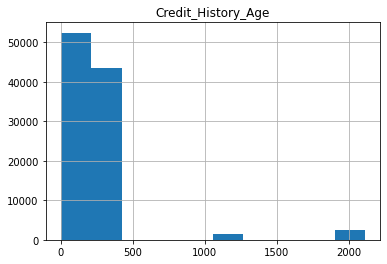

In [ ]:
# Histogram

plt.figure()
plt.title('Credit_History_Age')
df['Credit_History_Age'].hist()

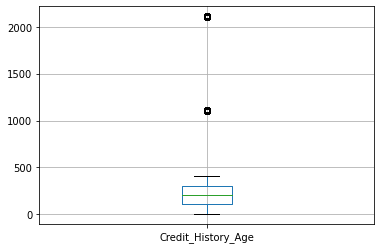

In [ ]:
# Boxplot
df.boxplot(['Credit_History_Age'])

## **Transformacija kolone "Payment_of_Min_Amount"**

 Unutar kolone "Payment_of_Min_Amount" nalaze se kategoricke varijable. 
 Postoje dvije YES i NO varijable, te True i NM varijable. True var 
 cemo prebaciti u YES a NP u No.

In [ ]:
# Transformacija
df['Payment_of_Min_Amount'].replace('NM', 'No', inplace = True)
df['Payment_of_Min_Amount'].replace('True', 'Yes', inplace = True)

In [ ]:
# Jedinstvene vrijednosti
df['Payment_of_Min_Amount'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Payment_of_Min_Amount'].value_counts(dropna=False)

Yes    52340
No     47682
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Payment_of_Min_Amount'].describe(percentiles=[.25, .5, .75], include="all")

count     100022
unique         2
top          Yes
freq       52340
Name: Payment_of_Min_Amount, dtype: object

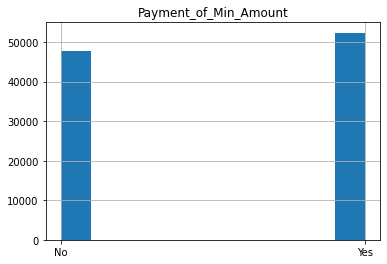

In [ ]:
# Histogram

plt.figure()
plt.title('Payment_of_Min_Amount')
df['Payment_of_Min_Amount'].hist()

## **Transformacija kolone "Total_EMI_per_month"**

 Unutar kolone "Total_EMI_per_month" nalazi se dosta outliera.
 Njih cemo rijesiti grupisanjem po CustomerId, i određivanjem medijane za grupu.

In [ ]:
# Transformacija
df["Total_EMI_per_month"] = df.groupby("Customer_ID")['Total_EMI_per_month'].transform("mean")

In [ ]:
# Jedinstvene vrijednosti
df['Total_EMI_per_month'].unique()

array([  49.57494921,   18.81621457,  246.9923195 , ...,   84.20594942,
       1567.34417582, 7360.46601978])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Total_EMI_per_month'].value_counts(dropna=False)

0.000000       7992
7.925876          9
35.339358         9
65.425242         9
69.136840         9
               ... 
80.576532         8
56.747677         8
39.628117         8
7962.789888       8
7360.466020       8
Name: Total_EMI_per_month, Length: 11502, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Total_EMI_per_month'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean       1403.551424
std        2916.605570
min           0.000000
25%          41.106397
50%         105.277684
75%         369.929379
max       29986.742104
Name: Total_EMI_per_month, dtype: float64

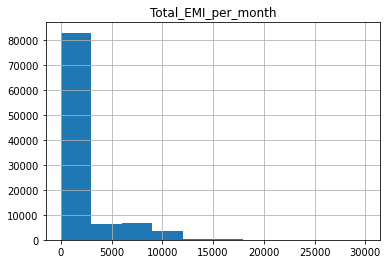

In [ ]:
# Histogram

plt.figure()
plt.title('Total_EMI_per_month')
df['Total_EMI_per_month'].hist()

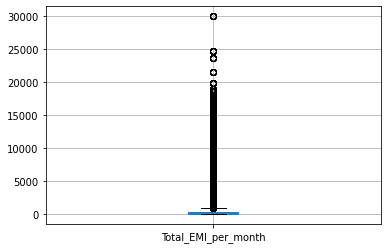

In [ ]:
# Boxplot
df.boxplot(['Total_EMI_per_month'])

## **Transformacija kolone "Amount_invested_monthly"**

 Unutar kolone "Amount_invested_monthly" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju dodatan tekst uz vrijednost.
 Taj tekst smo uklonuli i kolonu prebacili u float vrijednosti. Kolonu smo grupisali po CustomerId
 i uzeli srednju vrijednost Num_of_Delayed_Payment za grupu da bismo transformisali
 vrijednosti.

In [ ]:
# Transformacija
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df.mean())
df["Amount_invested_monthly"] = df.groupby("Customer_ID")['Amount_invested_monthly'].transform("mean")

<ipython-input-219-d502062b621b>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df.mean())


In [ ]:
# Jedinstvene vrijednosti
df['Amount_invested_monthly'].unique()

array([  98.35409025,   95.63799934, 2772.30251836, ...,  123.47334229,
        100.99204187,  160.06664828])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Amount_invested_monthly'].value_counts(dropna=False)

49.648601      9
117.623464     9
53.191314      9
1258.400286    9
132.433016     9
              ..
1314.040813    8
1304.244614    8
400.933254     8
181.011036     8
160.066648     8
Name: Amount_invested_monthly, Length: 12500, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Amount_invested_monthly'].describe(percentiles=[.25, .5, .75], include="all")

count    100022.000000
mean        637.472372
std         751.418354
min          15.292436
25%         117.167697
50%         233.554522
75%        1336.228669
max        5748.505316
Name: Amount_invested_monthly, dtype: float64

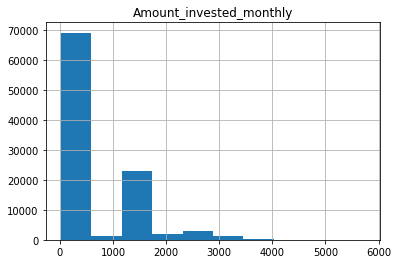

In [ ]:
# Histogram

plt.figure()
plt.title('Amount_invested_monthly')
df['Amount_invested_monthly'].hist()

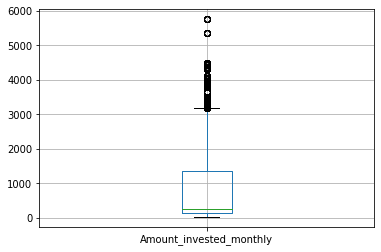

In [ ]:
# Boxplot
df.boxplot(['Amount_invested_monthly'])

## **Transformacija kolone "Payment_Behaviour"**

 Unutar kolone "Payment_Behaviour" nalaze se vrijednosti koje su stringovi, koji
 predstavljaju vrstu payment behaviour.  Nakon toga smo kreirali 5 novih kolona koje sadrže informaciju o vrsti payment behaviour. 
 Nakon izvlačenja novih kolona obrisali smo staru kolonu Payment_Behaviour.

In [ ]:
# Transformacija
df['Low_spent'] = np.where(df['Payment_Behaviour'].str.contains('Low_spent'), True, False)
df['High_spent'] = np.where(df['Payment_Behaviour'].str.contains('High_spent'), True, False)
df['Large_value_payments'] = np.where(df['Payment_Behaviour'].str.contains('Large_value_payments'), True, False)
df['Medium_value_payments'] = np.where(df['Payment_Behaviour'].str.contains('Medium_value_payments'), True, False)
df['Small_value_payments'] = np.where(df['Payment_Behaviour'].str.contains('Small_value_payments'), True, False)
df = df.drop(['Payment_Behaviour'], axis=1)

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df[['Low_spent', 'High_spent', 'Large_value_payments', 'Medium_value_payments', 'Small_value_payments']].value_counts(dropna=False)

Low_spent  High_spent  Large_value_payments  Medium_value_payments  Small_value_payments
True       False       False                 False                  True                    25521
False      True        False                 True                   False                   17544
True       False       False                 True                   False                   13862
False      True        True                  False                  False                   13725
                       False                 False                  True                    11342
True       False       True                  False                  False                   10427
False      False       False                 False                  False                    7601
dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df[['Low_spent', 'High_spent', 'Large_value_payments', 'Medium_value_payments', 'Small_value_payments']].describe(percentiles=[.25, .5, .75], include="all")

,Low_spent,High_spent,Large_value_payments,Medium_value_payments,Small_value_payments
count,100022,100022,100022,100022,100022
unique,2,2,2,2,2
top,False,False,False,False,False
freq,50212,57411,75870,68616,63159


## **Transformacija kolone "Monthly_Balance"**

 Unutar kolone "Monthly_Balance" nalaze se vrijednosti koje su stringovi, 
 iz razloga što neke vrijednosti imaju dodatan tekst uz vrijednost.
 Taj tekst smo uklonuli i kolonu prebacili u float vrijednosti.

  Kolonu smo grupisali po CustomerId
 i uzeli srednju vrijednost Num_of_Delayed_Payment za grupu da bismo transformisali
 vrijednosti.

In [ ]:
# Transformacija
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '')
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df.mean())
df["Monthly_Balance"] = df.groupby("Customer_ID")['Monthly_Balance'].transform("mean")
df['Monthly_Balance'].fillna(0, inplace=True)

<ipython-input-235-c2ae93a5f80b>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df.mean())


In [ ]:
# Jedinstvene vrijednosti
df['Monthly_Balance'].unique()

array([304.55529386, 454.34445275, 852.8992359 , ..., 369.39174861,
       261.76074295,   0.        ])

In [ ]:
# količina neke jedinstvene vrijednosti u datasetu
df['Monthly_Balance'].value_counts(dropna=False)

 0.000000e+00    1712
-4.166667e+25      72
 4.911901e+02       9
 2.965212e+02       9
 2.766835e+02       9
                 ... 
 3.882080e+02       8
 5.605552e+02       8
 4.072692e+02       8
 2.934905e+02       8
 4.468009e+02       8
Name: Monthly_Balance, Length: 12279, dtype: int64

In [ ]:
# Deskriptivna statistika za kolonu
df['Monthly_Balance'].describe(percentiles=[.25, .5, .75], include="all")

count    1.000220e+05
mean    -2.999340e+22
std      1.117514e+24
min     -4.166667e+25
25%      2.823220e+02
50%      3.356855e+02
75%      4.600997e+02
max      1.349265e+03
Name: Monthly_Balance, dtype: float64

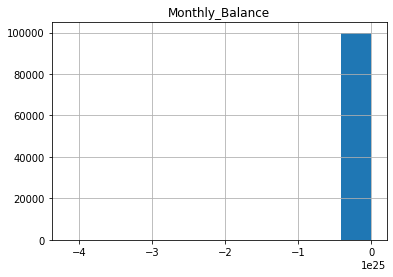

In [ ]:
# Histogram

plt.figure()
plt.title('Monthly_Balance')
df['Monthly_Balance'].hist()

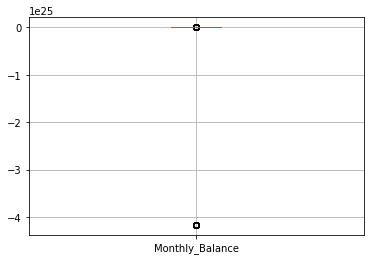

In [ ]:
# Boxplot
df.boxplot(['Monthly_Balance'])

# Sveukupna transformacija u jednoj ćeliji

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/MU/creditscore_dataset.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1)
df['Month'].replace(['3', '6', '8'], ['March', 'June', 'August'], inplace=True)
df[['Name','Age']] = df.apply(lambda x: split_name_and_age(x['Name_and_Age']), axis=1)
df['Age'] = df['Age'].str.replace('_', '')
df['Age'] = df['Age'].astype('float')
df.loc[(df['Age'] < 0) | (df['Age'] > 122), 'Age'] = np.nan
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'] = df['Age'].apply(np.floor)
df['Name'] = df['Name'].str.title()
df = df.drop(['Name_and_Age'], axis=1)
df = df.drop(['SSN'], axis=1)
df['Occupation'] = df['Occupation'].str.title()
df['Occupation'].replace('_______', 'No occupation', inplace = True)
df['Occupation'] = df['Occupation'].str.replace("_", " ")
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Annual_Income'] = df['Annual_Income'].astype('float')
df['Annual_Income'] = df['Annual_Income'].fillna(df['Annual_Income'].mean())
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform("mean")
df['Monthly_Inhand_Salary'] = df.groupby("Customer_ID")['Monthly_Inhand_Salary'].transform("mean")
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].str.replace('accounts', '')
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].str.replace(' ', '')
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].astype('float')
df["Num_Bank_Accounts"] = df.groupby("Customer_ID")['Num_Bank_Accounts'].transform("mean")
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(np.floor)
df['Num_Credit_Card'] = df['Num_Credit_Card'].str.replace('cards', '')
df['Num_Credit_Card'] = df['Num_Credit_Card'].str.replace(' ', '')
df['Num_Credit_Card'] = df['Num_Credit_Card'].astype('float')
df["Num_Credit_Card"] = df.groupby("Customer_ID")['Num_Credit_Card'].transform("mean")
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(np.floor)
df["Interest_Rate"] = df.groupby("Customer_ID")['Interest_Rate'].transform("mean")
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].astype('float')
df.loc[(df['Num_of_Loan'] < 0), 'Num_of_Loan'] = np.nan
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].mean())
df["Num_of_Loan"] = df.groupby("Customer_ID")['Num_of_Loan'].transform("mean")
df['Num_of_Loan'] = df['Num_of_Loan'].apply(np.floor)
df['Auto_Loan'] = np.where(df['Type_of_Loan'].str.contains('Auto Loan'), True, False)
df['Credit_Builder_Loan'] = np.where(df['Type_of_Loan'].str.contains('Credit-Builder Loan'), True, False)
df['Personal_Loan'] = np.where(df['Type_of_Loan'].str.contains('Personal Loan'), True, False)
df['Home_Equity_Loan'] = np.where(df['Type_of_Loan'].str.contains('Home Equity Loan'), True, False)
df['Not_Specified'] = np.where(df['Type_of_Loan'].str.contains('Not Specified') | df['Type_of_Loan'].str.contains('uknown'), True, False)
df['Payday_Loan'] = np.where(df['Type_of_Loan'].str.contains('Payday Loan'), True, False)
df['Student_Loan'] = np.where(df['Type_of_Loan'].str.contains('Student_Loan'), True, False)
df['Mortgage_Loan'] = np.where(df['Type_of_Loan'].str.contains('Mortgage Loan'), True, False)
df['Debt_Consolidation_Loan'] = np.where(df['Type_of_Loan'].str.contains('Debt Consolidation Loan'), True, False)
df = df.drop(['Type_of_Loan'], axis=1)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'].replace('_', np.NaN, inplace = True)
df['Num_of_Delayed_Payment'].replace('', np.NaN, inplace = True)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')
df.loc[df['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = np.NaN
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean())
df["Num_of_Delayed_Payment"] = df.groupby("Customer_ID")['Num_of_Delayed_Payment'].transform("mean")
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(np.floor)
df['Changed_Credit_Limit'].replace('_', np.NaN, inplace = True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')
df["Changed_Credit_Limit"] = df.groupby("Customer_ID")['Changed_Credit_Limit'].transform("mean")
df["Num_Credit_Inquiries"] = df.groupby("Customer_ID")['Num_Credit_Inquiries'].transform("mean")
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].apply(np.floor)
df['Credit_Mix'].replace('_', 'Unknown', inplace = True)
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].mean())
df["Outstanding_Debt"] = df.groupby("Customer_ID")['Outstanding_Debt'].transform("mean")
for x in df['Credit_History_Age'].unique():
  df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(str(x), str(toMonths(x)))
df['Credit_History_Age'] = df['Credit_History_Age'].astype('float')  
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean())
df["Credit_History_Age"] = df.groupby("Customer_ID")['Credit_History_Age'].transform("mean")
df['Payment_of_Min_Amount'].replace('NM', 'No', inplace = True)
df['Payment_of_Min_Amount'].replace('True', 'Yes', inplace = True)
df["Total_EMI_per_month"] = df.groupby("Customer_ID")['Total_EMI_per_month'].transform("mean")
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('_', '')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean())
df["Amount_invested_monthly"] = df.groupby("Customer_ID")['Amount_invested_monthly'].transform("mean")
df['Low_spent'] = np.where(df['Payment_Behaviour'].str.contains('Low_spent'), True, False)
df['High_spent'] = np.where(df['Payment_Behaviour'].str.contains('High_spent'), True, False)
df['Large_value_payments'] = np.where(df['Payment_Behaviour'].str.contains('Large_value_payments'), True, False)
df['Medium_value_payments'] = np.where(df['Payment_Behaviour'].str.contains('Medium_value_payments'), True, False)
df['Small_value_payments'] = np.where(df['Payment_Behaviour'].str.contains('Small_value_payments'), True, False)
df = df.drop(['Payment_Behaviour'], axis=1)
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '')
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())
df["Monthly_Balance"] = df.groupby("Customer_ID")['Monthly_Balance'].transform("mean")

In [ ]:
df.to_csv(r'/content/drive/Shareddrives/MU/cleared_creditscore_dataset.csv', index=False)

# **Analiza podataka nakon transformacije**

Iz slijedeće ćelije koda možemo vidjeti da u poređenju s početnim datasetom, imamo isti broj redova, tj 100022, ali se broj kolona povećao s 30 na 39.

In [ ]:
# dimenzije seta podataka nakon transformacije
df.shape

(100022, 39)

Dosta kolona smo prebacili iz tipa object u tip float, pa imamo više numeričkih varijabli.

In [ ]:
# nazivi varijabli i tipovi podataka nakon transformacije
print("Nazivi varijabli i tipovi podataka: \n")
df.dtypes

Nazivi varijabli i tipovi podataka: 



ID                           object
Customer_ID                  object
Month                        object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
Name                         object
Age                         float64
Auto_Loan                      bool
Credit_Builder_Loan            bool
Personal_Loan               

Nakon transformacije sada imamo 17 numeričkih kolona

In [ ]:
# Selekcija numeričkih varijabli nakon
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numerics = df.select_dtypes(include=numerics)
df_numerics

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Age
0,19114.12,1824.843333,3.0,4.0,3.00,4.0,3.0,6.0,10.27,4.0,809.98,26.822620,265.0,49.574949,98.354090,304.555294,23.0
1,19114.12,1824.843333,3.0,4.0,3.00,4.0,-1.0,6.0,10.27,4.0,809.98,31.944960,0.0,49.574949,98.354090,304.555294,23.0
2,19114.12,1824.843333,3.0,4.0,3.00,4.0,3.0,6.0,10.27,4.0,809.98,28.609352,267.0,49.574949,98.354090,304.555294,33.0
3,19114.12,1824.843333,3.0,4.0,3.00,4.0,5.0,6.0,10.27,4.0,809.98,31.377862,268.0,49.574949,98.354090,304.555294,23.0
4,19114.12,1824.843333,3.0,4.0,3.00,4.0,6.0,6.0,10.27,4.0,809.98,24.797347,269.0,49.574949,98.354090,304.555294,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100017,39628.99,3359.415833,4.0,6.0,722.25,2.0,23.0,6.0,11.00,3.0,502.38,34.663572,318.0,7360.466020,160.066648,0.000000,25.0
100018,39628.99,3359.415833,4.0,6.0,722.25,2.0,18.0,6.0,11.00,3.0,502.38,40.565631,319.0,7360.466020,160.066648,0.000000,25.0
100019,39628.99,3359.415833,4.0,6.0,722.25,2.0,27.0,6.0,11.00,3.0,502.38,41.255522,320.0,7360.466020,160.066648,0.000000,25.0
100020,39628.99,3359.415833,4.0,6.0,722.25,2.0,20.0,6.0,11.00,3.0,502.38,33.638208,381.0,7360.466020,160.066648,0.000000,25.0


U slijedećoj tabeli imamo i prikaz deskriptivne statistike za sve kolone

In [ ]:
# Deskriptivna statistika za sve varijable
df.describe(percentiles=[.25, .5, .75], include="all")

,ID,Customer_ID,Month,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Not_Specified,Payday_Loan,Student_Loan,Mortgage_Loan,Debt_Consolidation_Loan,Low_spent,High_spent,Large_value_payments,Medium_value_payments,Small_value_payments
count,96146,96146,96146,96146,9.614600e+04,96146.000000,96146.000000,96146.000000,96146.000000,100022.000000,...,100022,100022,100022,100022,100022,100022,100022,100022,100022,100022
unique,96124,12500,8,16,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,2,2,2,2,2,2,2
top,0xc600,CUS_0x5313,May,No occupation,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
freq,2,9,12063,6778,NaN,NaN,NaN,NaN,NaN,NaN,...,66156,57834,88565,58405,58674,51816,55240,72930,65953,60709
mean,NaN,NaN,NaN,NaN,1.761714e+05,4199.173284,17.029216,22.388087,72.530861,6.878187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.071647e+05,3189.068968,41.417656,45.486202,165.176698,21.746616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.005771e+04,1625.188333,4.000000,4.000000,8.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.065174e+04,3096.836667,6.000000,6.000000,16.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,8.292804e+04,5961.745000,8.000000,8.000000,27.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Korelacija između parova varijabli nakon transformacije 

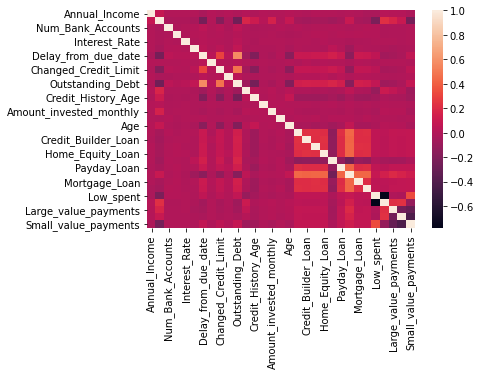

In [ ]:
#Vizuelni prikaz korelacije izmedju parova varijabli
CorrMatrix = pd.DataFrame.corr(df)
sns.heatmap(CorrMatrix)
plt.show()

# Spremanje dataFrame-a u novi CSV za potrebe korištenja u drugom zadatku

In [ ]:
df.to_csv(r'/content/drive/Shareddrives/MU/cleared_creditscore_dataset.csv', index=False)